<pre>序列模型

想象一下有人正在看网飞（Netflix，一个国外的视频网站）上的电影。 一名忠实的用户会对每一部电影都给出评价， 毕竟一部好电影需要更多的支持和认可。 然而事实证明，事情并不那么简单。 随着时间的推移，人们对电影的看法会发生很大的变化。 事实上，心理学家甚至对这些现象起了名字：

    锚定（anchoring）效应：基于其他人的意见做出评价。 例如，奥斯卡颁奖后，受到关注的电影的评分会上升，尽管它还是原来那部电影。 这种影响将持续几个月，直到人们忘记了这部电影曾经获得的奖项。 结果表明（ (Wu et al., 2017)），这种效应会使评分提高半个百分点以上。

    享乐适应（hedonic adaption）：人们迅速接受并且适应一种更好或者更坏的情况 作为新的常态。 例如，在看了很多好电影之后，人们会强烈期望下部电影会更好。 因此，在许多精彩的电影被看过之后，即使是一部普通的也可能被认为是糟糕的。

    季节性（seasonality）：少有观众喜欢在八月看圣诞老人的电影。

    有时，电影会由于导演或演员在制作中的不当行为变得不受欢迎。

    有些电影因为其极度糟糕只能成为小众电影。Plan9from Outer Space和Troll2就因为这个原因而臭名昭著的。

简而言之，电影评分决不是固定不变的。 因此，使用时间动力学可以得到更准确的电影推荐 (Koren, 2009)。 当然，序列数据不仅仅是关于电影评分的。 下面给出了更多的场景。

    在使用程序时，许多用户都有很强的特定习惯。 例如，在学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更常用。

    预测明天的股价要比过去的股价更困难，尽管两者都只是估计一个数字。 毕竟，先见之明比事后诸葛亮难得多。 在统计学中，前者（对超出已知观测范围进行预测）称为外推法（extrapolation）， 而后者（在现有观测值之间进行估计）称为内插法（interpolation）。

    在本质上，音乐、语音、文本和视频都是连续的。 如果它们的序列被我们重排，那么就会失去原有的意义。 比如，一个文本标题“狗咬人”远没有“人咬狗”那么令人惊讶，尽管组成两句话的字完全相同。

    地震具有很强的相关性，即大地震发生后，很可能会有几次小余震， 这些余震的强度比非大地震后的余震要大得多。 事实上，地震是时空相关的，即余震通常发生在很短的时间跨度和很近的距离内。

    人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。


统计工具

处理序列数据需要统计工具和新的深度神经网络架构。 为了简单起见，我们以 图8.1.1所示的股票价格（富时100指数）为例。
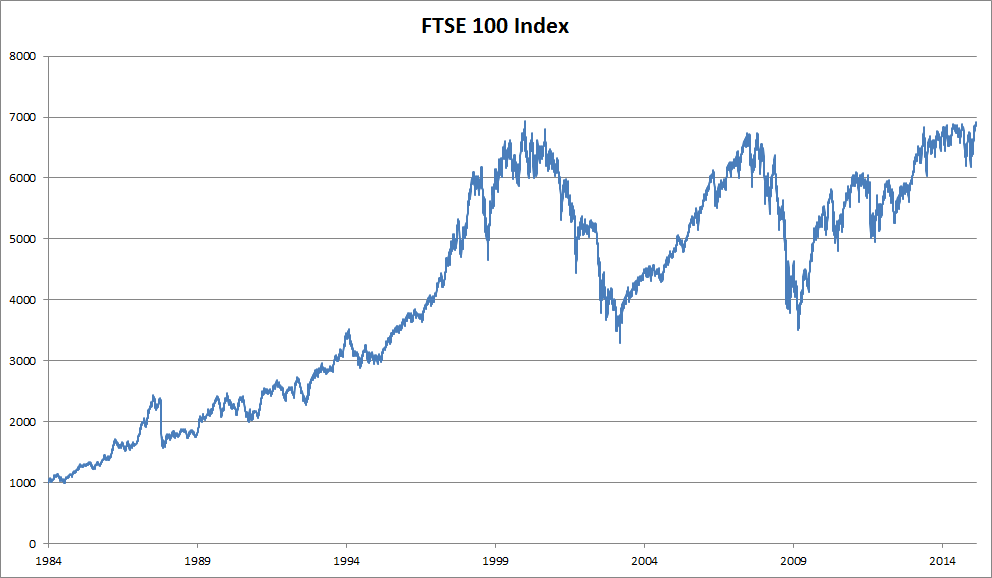  
其中，$x_t$用表示价格，即在时间步（time step） $x \in Z^+$时，观察到的价格$x_t$。  
请注意，t对于本文中的序列通常是离散的，并在整数或其子集上变化。  
假设一个交易员想在日的股市中表现良好，于是通过以下途径预测$x_t$：  
$$x_t~P(x_t|x_{t-1},...,x_1)$$

自回归模型

为了实现这个预测，交易员可以使用回归模型， 例如在 3.3节中训练的模型。 仅有一个主要问题：输入数据的数量， 输入$x_{t-1},...,x_1$本身因而异。  
也就是说，输入数据的数量这个数字将会随着我们遇到的数据量的增加而增加， 因此需要一个近似方法来使这个计算变得容易处理。  
本章后面的大部分内容将围绕着如何有效估计$x_t~P(x_t|x_{t-1},...,x_1)$展开。 简单地说，它归结为以下两种策略。  

第一种策略，假设在现实情况下相当长的序列$x_{t-1},...,x_1$可能是不必要的， 因此我们只需要满足某个长度为$\tau$的时间跨度， 即使用观测序列$x_{t-1},...,x_{t-\tau}$。  
当下获得的最直接的好处就是参数的数量总是不变的， 至少在$t>\tau$时如此，这就使我们能够训练一个上面提及的深度网络。  
这种模型被称为自回归模型（autoregressive models）， 因为它们是对自己执行回归。  

第二种策略，如 图8.1.2所示， 是保留一些对过去观测的总结$h_t$， 并且同时更新预测$\hat x_t$和总结$h_t$。    
这就产生了基于$\hat x_t=P(x_t|h_t)$估计$x_t$， 以及公式$h_t=g(h_{t-1},x_{t-1})$更新的模型。    
由于$h_t$从未被观测到，这类模型也被称为 隐变量自回归模型（latent autoregressive models）。  
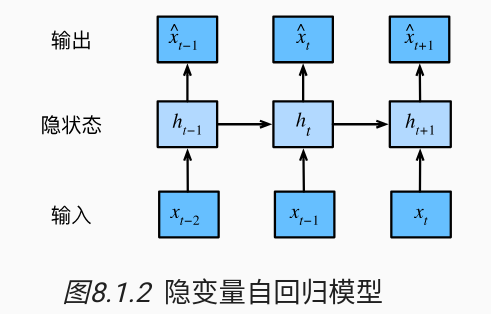 